In [1]:
import sys
sys.path.append('./RECOTOOLS/')
import gistools

## Survey Site Definition

Here we define the relevant details for the tunnel. Make sure that the tunnel portal positions are defined in standard lat/lon position co-ordinates, and the centre point is set using co-ordinates obtained from google maps. After which you can run the cell to draw the map and use the built in query marker tools to help fill in missing data. 

In [2]:
data = {
    "tunnel": [
        [52.164889, -2.723257],
        [52.16129699826637, -2.7198886871337895],
        [52.156852, -2.715517]
    ],
    "centre": [52.157000, -2.715432], 
    "start_portal": [52.164889, -2.723257],
    "end_portal":[52.156852, -2.715517],
    "start_label": "",
    "end_label": "",
    "tunnel_width": 9,
    "shaft_width": 3,
    "start_chains": "",
    "end_chains": "",
    "shaft_meters_start": [],
    "shaft_meters_end": [],
    "shaft_positions": [],
    "access_positions": [[52.164889, -2.723257],[52.156852, -2.715517]]
}
        
# Generate the map object from data
m = (gistools.build_gis_handler(data))


In [3]:
# Open map in jupyter
display(m)

Map(center=[52.157, -2.715432], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

## Raster data interpolation

The following code will generate a tunnel elevation prescription given the provided DTM raster data. Make sure any elevation GEOTIFFs are in EPSG27700 and placed inside `GIS/` with a label pattern that has `DTM` in the name. 

For example `GIS/DTM_SX8565_P_10600_20200120_20200120.tif`

In addition you can place DSM and VOM files in the same folder and these will be added to the site map data frame.

The output is a GIS model which is raw data (no gradient correction) showing the ellevation in track X and Y coordinates (along crown and offset to crown respectively). Corresponding lat/lon positions are also included for projecting tunnel results back onto a google earth image.

  0%|          | 0/1059 [00:00<?, ?it/s]

 - Processed -20 metres in.


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Organizing sample points
Looking in GIS/*DTM*.tif for DTM files
 - DTM GIS/SO55sw_DTM_1m.tif found!
Looking in GIS/*DSM*.tif for DSM files
 - DSM GIS/DSM_SO5050_P_10635_20200106_20200205.tif found!
Looking in GIS/*VOM*.tif for VOM files
Building final overburden data frame
length = 1039.0096392913626
dfcrown.X = 0    -20
1    480
2    980
Name: X, dtype: int64
maximum_x =  980
{'tunnel': [[52.164889, -2.723257], [52.16129699826637, -2.7198886871337895], [52.156852, -2.715517]], 'centre': [52.157, -2.715432], 'start_portal': [52.164889, -2.723257], 'end_portal': [52.156852, -2.715517], 'start_label': '', 'end_label': '', 'tunnel_width': 9, 'shaft_width': 3, 'start_chains': '', 'end_chains': '', 'shaft_meters_start': [], 'shaft_meters_end': [], 'shaft_positions': [], 'access_positions': [[52.164889, -2.723257], [52.156852, -2.715517]], 'gradient': -0.006113034205511004, 'length': 1039.0096392913626, 'start_elevation': 94.6810073852539, 'end_elevation': 88.32950592041016}
    X   Y       

/tmp/ipykernel_61881/2124028805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gis_df.CROWN_gradcorr[ gis_df.CROWN_gradcorr > gis_df.DTM_gradcorr ] = gis_df.DTM_gradcorr[ gis_df.CROWN_gradcorr > gis_df.DTM_gradcorr ]


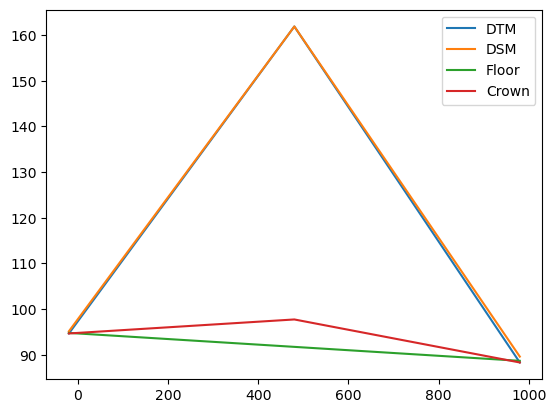

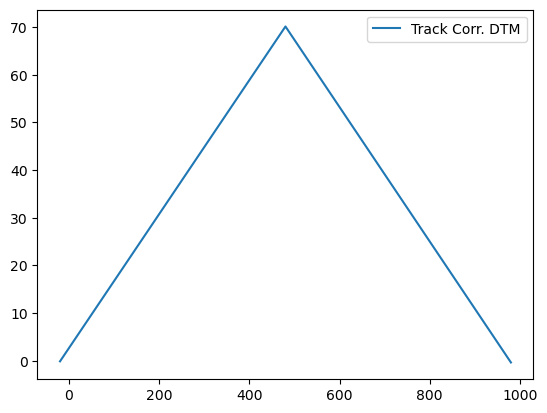

In [4]:
# Generate the Elevation DFs and overlays
regenerate_elevation = True
if regenerate_elevation:
    # Process all available tiffs into a gis model
    gis_df = gistools.process_elevation_tiffs(data, distance_resolution = 500, offset_resolution = 1, offset_progress =True)

    gis_df.CROWN_gradcorr[ gis_df.CROWN_gradcorr > gis_df.DTM_gradcorr ] = gis_df.DTM_gradcorr[ gis_df.CROWN_gradcorr > gis_df.DTM_gradcorr ]

    # Save GIS Model
    gis_df.to_csv("GIS/generated_gis_model.csv")
    # Remove dodgy DTM elevation values
    gis_df = gis_df[gis_df.DTM > 0].reset_index()
else:
    gis_df = gistools.pd.read_csv("GIS/generated_gis_model.csv")
    
# Make a plot of the elevation profile along the crown
gistools.plot_elevation(gis_df)

In [5]:
from gistools import get_gis_crown
import matplotlib.pyplot as plt
import numpy as np

In [6]:
np.max(gis_df.X) 


980

In [7]:
dfcrown

NameError: name 'dfcrown' is not defined

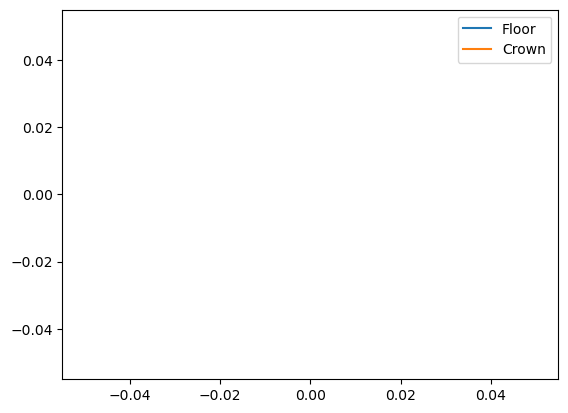

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


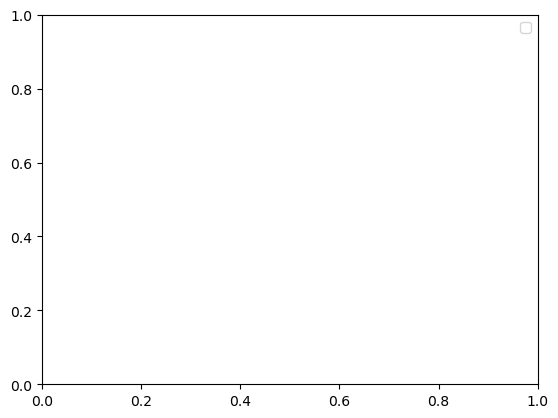

In [ ]:
    dfcrown = get_gis_crown(gis_df, 5)
    #plt.plot(dfcrown.X, dfcrown.DTM, label="DTM")
    #plt.plot(dfcrown.X, dfcrown.DSM, label="DSM")
    plt.plot(dfcrown.X, dfcrown.FLOOR, label="Floor")
    plt.plot(dfcrown.X, dfcrown.CROWN, label="Crown")
    plt.legend()
    plt.show()

    #plt.plot(dfcrown.X, dfcrown.DTM_gradcorr, label="Track Corr. DTM")
    
    plt.legend()
    plt.show()

/home/tadgh/Tunnels/Jupyter Notebooks/tunnel_processing/./RECOTOOLS/gistools.py:664: RuntimeWarning: invalid value encountered in divide
  acc_norm = acc_norm / np.nanmax(acc_norm)


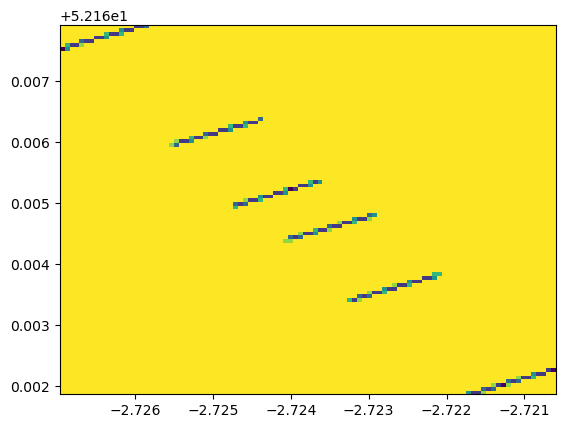

In [ ]:
# Add to our Map Above
gistools.add_gis_data(m, gis_df, key="DTM", bins=100)
gistools.add_gis_data(m, gis_df, key="DSM", bins=100)
gistools.add_gis_data(m, gis_df, key="VOM", bins=100)

## Rate Estimate
Now we can use the DTM to estimate the possible rate variation given the overburden.

Parsing Opacity Table :  standard_rock
Built Lookups


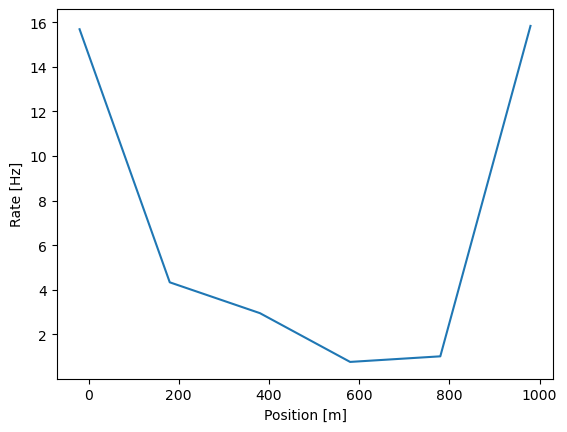

In [ ]:
data["opensky_rate"] = 16.4
gistools.plot_rate(data, gis_df)

## Site Report
Now we calculate some site statistics to help with survey planning.
Build site report can be extended to calculate run times if necessary.

In [ ]:
gistools.build_site_report(data)

- TUNNEL
--- Start Portal : 
--- Start Position : [52.156994, -2.715671]
--- End Portal : 
--- End Position : [52.164493, -2.722931]
--- Straight Length : 969.8218590656949m
- ACCESS 0
--- Position : [52.156994, -2.715671]
--- Dist from  : 0.0m
--- Dist from  : 969.82m
- ACCESS 1
--- Position : [52.164493, -2.722931]
--- Dist from  : 969.82m
--- Dist from  : 0.0m
- STATISTICS
--- Points for 10m Survey 96.98218590656948
--- Points for 5m Survey 193.96437181313897
--- Points for 2.5m Survey 387.92874362627794
--- Points for +-30m Shaft Characterization 0.0
--- Crow-flies Walk-in Time Mins to :  0.0 32.327333333333335
--- Crow-flies Walk-in Time Mins to :  0.0 32.327333333333335
No Overburden information saved!
